![alt text](UM6P.png)

***Abderahmane HAMDOUCHI***



**Master SDAD**

**UM6P**

\newpage


# Web Structure Mining


### la documentation officielle de Networkx:  https://networkx.org/documentation/stable/index.html

In [2]:


import networkx as nx
from networkx.algorithms import community as nxcommunity
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### commencer par le chargement du graphe

In [3]:
pathData = "lesmis.gml"

### ensuite, naviguer sur la documentation de networkx et trouver comment charger un réseau dans le format GML

Vous pouvez avoir une idée sur ce format en ouvrant le fichier dans un editeur. à noter que le graphe n'est pas dirigé 

In [4]:
g = nx.read_gml(pathData)


## La détection de communauté 
Dans cette section, nous nous concentrerons sur l'algorithme de détection de communauté. Pour cela, consultez la documentation du package networkx et appliquez les algorithmes de détection de communauté suivants:

1. La méthode de bipartition de Kernighan–Lin 
2. La méthode de Percolation (K-clique) vue dans le cours 
3. La méthode Fluid communities 
4. La méthode Girvan-Newman

Lorsque le nombre de communautés à détecter doit être spécifié en tant que paramètre, vous utiliserez la métrique de couverture (coverage metric) pour sélectionner le nombre approprié (compris entre 2 et 5).

Enfin, pour chaque algorithme de communauté, vous ajouterez un attribut à chaque nœud du graphe. La valeur de l'attribut sera l'identifiant de la communauté à laquelle appartient le nœud (allant de 0 à nbCommunity -1).

In [5]:
community = {}

def dictite_to_dict(d):
    s = []
    for part in d:
        a = set()
        for i in part:
            a.add(i)
        s.append(a)
    return s

#### 1.La méthode de bipartition de Kernighan–Lin

In [6]:
community['bipartition'] = dictite_to_dict(nxcommunity.kernighan_lin.kernighan_lin_bisection(g))

#### 2. La méthode de Percolation (K-clique)

In [7]:
community['percolation'] = dictite_to_dict(nxcommunity.k_clique_communities(g, 3))

#### 3. La méthode Fluid communities

In [8]:
res = {}
partitions = {}
for i in range(2, 6):
    part = list(nxcommunity.asyn_fluidc(g, i))
    res[i] = nxcommunity.quality.coverage(g, dictite_to_dict(part))
    partitions[i] = part
    
community['fluid'] = dictite_to_dict(partitions[max(res, key=res.get)])

#### 4. La méthode Girvan-Newman

In [9]:
res = {}
grivan = list(nxcommunity.girvan_newman(g))
for i in range(0, 5):
    res[i] = nxcommunity.quality.coverage(g, dictite_to_dict(grivan[i]))

community['girvan'] = dictite_to_dict(grivan[max(res, key=res.get)])

In [10]:
for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            g.nodes[n][k] = c_num

## la visualisation des communautés 
Nous allons maintenant visualiser le résultat de l'algorithme de détection de communication. Pour cela, nous commençons par filtrer certains nœuds de la visualisation. En particulier, nous aimerions filtrer les nœuds qui n'appartiennent à aucune communauté selon la méthode de percolation. Pour ce faire, vous devez créer une liste contenant le libellé des nœuds appartenant à une communauté selon la méthode de percolation. Vous pouvez utiliser le dictionnaire suivant pour définir les options de visualisation.

```json
options = {
    'node_color' : colorNode, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 10000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 15,
    "nodelist" : nodes, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(18,18))
nx.draw(g,**options)```

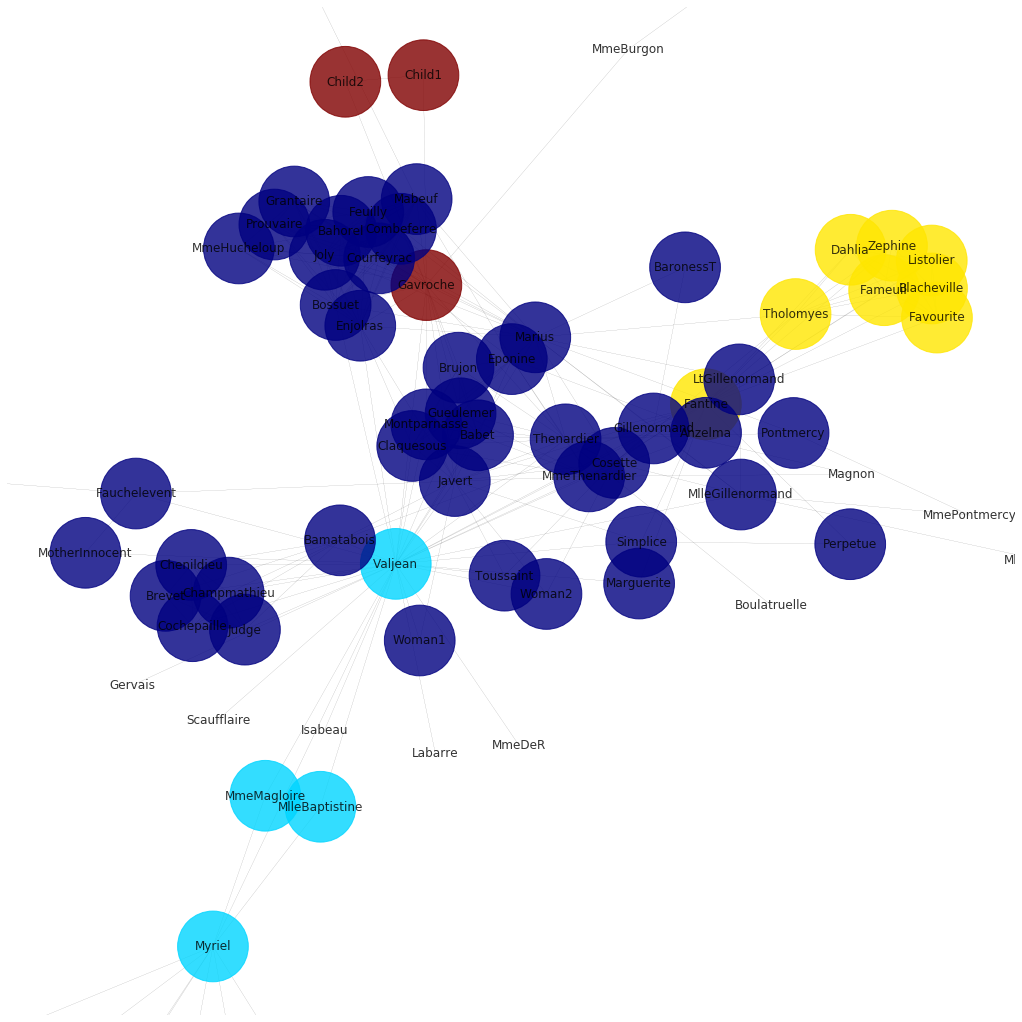

In [11]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes(g, 'percolation')
percoAttrList = list(percoAttr)

for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node)
        
options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 5000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(14,14))
nx.draw(g,**options)

# TAF

1. Visualisez les communautés produites en utilisant la méthode de Girvan-Newman

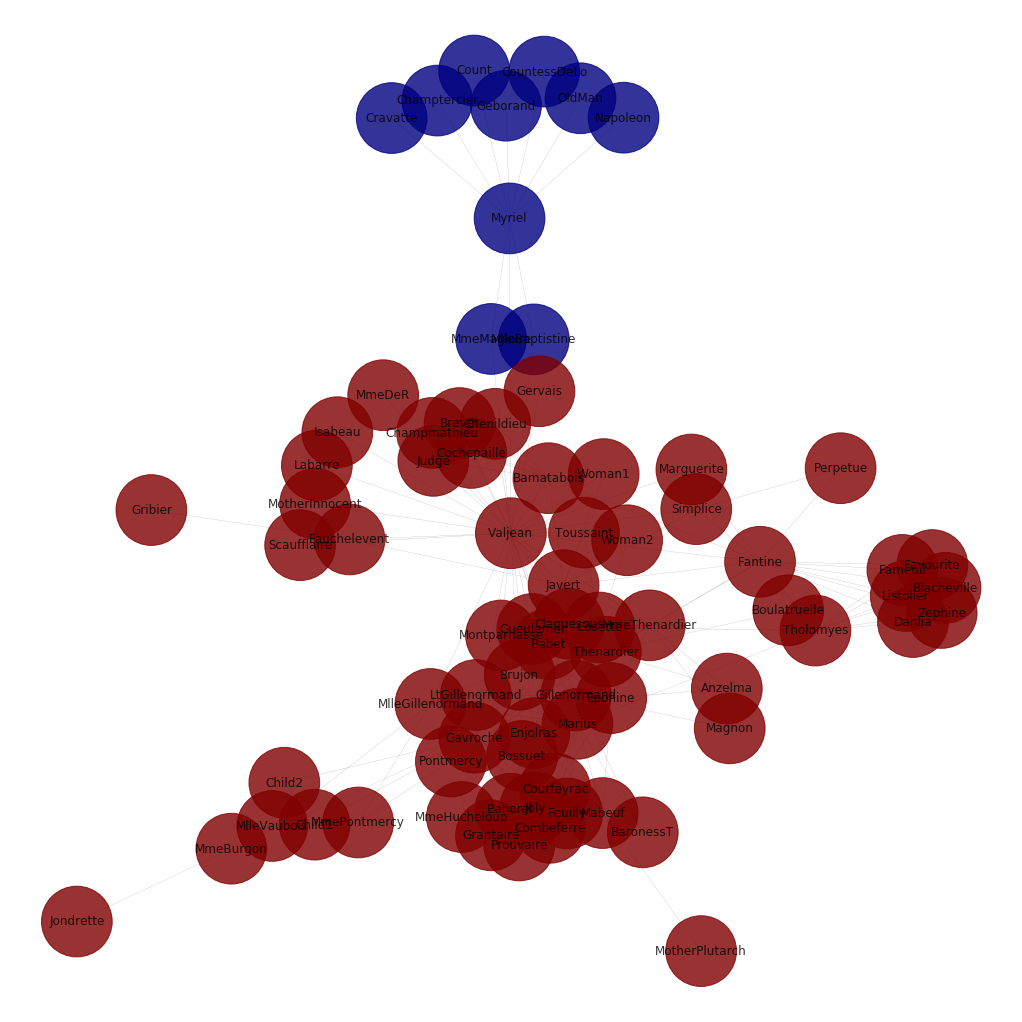

In [13]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

givenAttr = nx.get_node_attributes(g, 'girvan')
givenAttrList = list(givenAttr)

for node in givenAttrList:
    if (givenAttr[node] >= 0):
        node_color.append(float(givenAttr[node]))
        node_list.append(node)
        
options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 5000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(14,14))
nx.draw(g,**options)